# Recitation 1: Python and OLS Basics
## Spring 2024

In [29]:
# Load dataset
data = pd.read_csv('Carseats.csv')

A simulated data set containing sales of child car seats at 400 different stores.


- Sales: Unit sales (in thousands) at each location

- CompPrice: Price charged by competitor at each location

- Income: Community income level (in thousands of dollars)

- Advertising: Local advertising budget for company at each location (in thousands of dollars)

- Population: Population size in region (in thousands)

- Price: Price company charges for car seats at each site

- ShelveLoc: A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site

- Age: Average age of the local population

- Education: Education level at each location

- Urban: A factor with levels No and Yes to indicate whether the store is in an urban or rural location

- US: A factor with levels No and Yes to indicate whether the store is in the US or not

We'll use sales as our dependent variable

In [30]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [31]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


<Figure size 576x432 with 0 Axes>

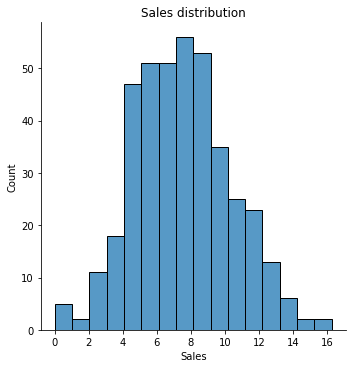

In [32]:
#sales distribution
plt.figure(figsize=(8, 6))  # increase the size of the plot
sns.displot(data.Sales)
plt.title("Sales distribution")
plt.show()

<Figure size 576x432 with 0 Axes>

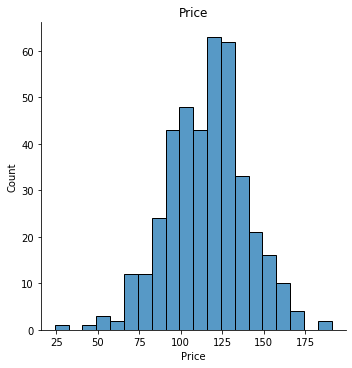

In [39]:
#price distribution
plt.figure(figsize=(8, 6))  # increase the size of the plot
sns.displot(data.Price)
plt.title("Price")
plt.show()

## Plotting the Data

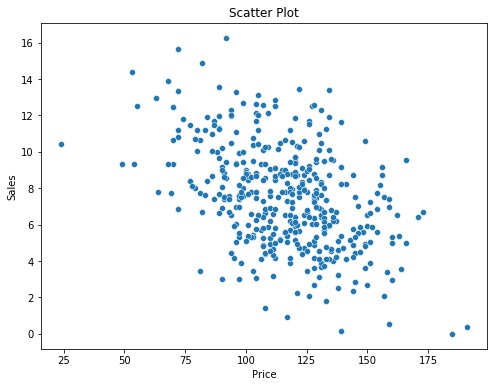

In [10]:
# Create scatter plots
plt.figure(figsize=(8, 6))  # increase the size of the plot
sns.scatterplot(data=data,x='Price',y='Sales')
plt.title('Scatter Plot')
plt.show()

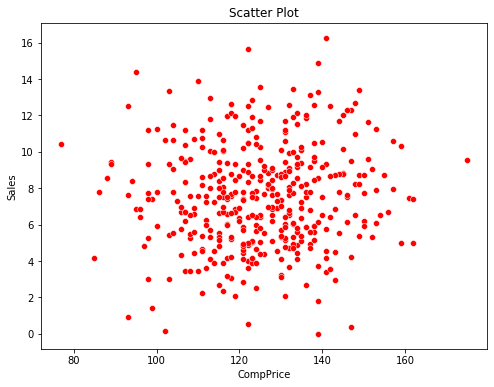

In [12]:
# Create scatter plots
plt.figure(figsize=(8, 6))  # increase the size of the plot
sns.scatterplot(data=data,x='CompPrice',y='Sales',color='red')
plt.title('Scatter Plot')
plt.show()

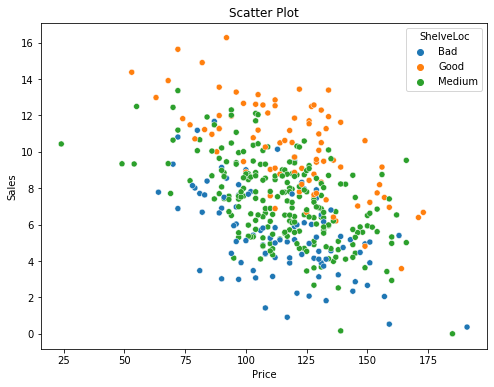

In [16]:
# Create scatter plots
plt.figure(figsize=(8, 6))  # increase the size of the plot
sns.scatterplot(data=data,x='Price',y='Sales',hue='ShelveLoc')
plt.title('Scatter Plot')
plt.show()

## Model

In [61]:
# Define the dependent and independent variables
X = data[['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
'ShelveLoc', 'Age', 'Education', 'Urban', 'US']]  # independent variables
y = data['Sales']  # dependent variable

In [62]:
# Add a constant to the independent variables
X = sm.add_constant(X)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [63]:
X

,const,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1.0,138,73,11,276,120,Bad,42,17,Yes,Yes
1,1.0,111,48,16,260,83,Good,65,10,Yes,Yes
2,1.0,113,35,10,269,80,Medium,59,12,Yes,Yes
3,1.0,117,100,4,466,97,Medium,55,14,Yes,Yes
4,1.0,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,Good,33,14,Yes,Yes
396,1.0,139,23,3,37,120,Medium,55,11,No,Yes
397,1.0,162,26,12,368,159,Medium,40,18,Yes,Yes
398,1.0,100,79,7,284,95,Bad,50,12,Yes,Yes


In [64]:
y

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [65]:
# Fit the regression model
model = sm.OLS(y, X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [66]:
pd.get_dummies(X[['ShelveLoc','Urban','US']],drop_first=True)

,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,0,0,1,1
1,1,0,1,1
2,0,1,1,1
3,0,1,1,1
4,0,0,1,0
...,...,...,...,...
395,1,0,1,1
396,0,1,0,1
397,0,1,1,1
398,0,0,1,1


In [67]:
# Create dummy variables
dummies = pd.get_dummies(X[['ShelveLoc', 'Urban', 'US']], drop_first=True)

# Concatenate the dummy variables with the original DataFrame and drop original columns
X = pd.concat([X, dummies], axis=1)

#drop categorical columns
X = X.drop(['ShelveLoc', 'Urban', 'US'], axis=1)

In [68]:
X

,const,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,1.0,138,73,11,276,120,42,17,0,0,1,1
1,1.0,111,48,16,260,83,65,10,1,0,1,1
2,1.0,113,35,10,269,80,59,12,0,1,1,1
3,1.0,117,100,4,466,97,55,14,0,1,1,1
4,1.0,141,64,3,340,128,38,13,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,1.0,138,108,17,203,128,33,14,1,0,1,1
396,1.0,139,23,3,37,120,55,11,0,1,0,1
397,1.0,162,26,12,368,159,40,18,0,1,1,1
398,1.0,100,79,7,284,95,50,12,0,0,1,1


In [69]:
# Fit the regression model
model = sm.OLS(y, X).fit()

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.60e-166
Time:                        21:52:08   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603      9.380      0.000       4.474       6.847
CompPrice            0.0928      0.004     22.378      0.000       0.085       0.101
Income               0.0158      0.002      8.565      0.000       0.012       0.019
Advertising          0.1231      0.011     11.066      0.000       0.101       0.145
Population           0.0002      0.000      0.561      0.575      -0.001       0.001
Price               -0.0954      0.003    -35.700      0.000      -0.101      -0.090
Age                 -0.0460      0.003    -14.472      0.000      -0.052      -0.040
Education           -0.0211      0.020     -1.070      0.285      -0.060       0.018
ShelveLoc_Good       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc_Medium     1.9567      0.126     15.516      0.000       1.709       2.205
Urban_Yes            0.1229      0.113      1.088      0.277      -0.099       0.345
US_Yes              -0.1841      0.150     -1.229      0.220      -0.479       0.111
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
# Print the summary statistics of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.60e-166
Time:                        21:52:32   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                5.6606      0.603  

### Dependent Variable
- The dependent variable is `Sales`, representing unit sales (in thousands) at each location.

### Coefficients Interpretation
- **const (5.6606)**: This is the intercept term. It implies the expected value of `Sales` when all other predictors are 0.
- **CompPrice (0.0928)**: Indicates that for each unit increase in `CompPrice`, `Sales` is expected to increase by 0.0928 units, holding other variables constant.
- **Income (0.0158)**: Suggests that for each unit increase in `Income`, `Sales` is expected to increase by 0.0158 units.
- **Advertising (0.1231)**: Implies that for each unit increase in `Advertising`, `Sales` is expected to increase by 0.1231 units.
- **Population (0.0002)**: This coefficient is very small and not statistically significant (p-value: 0.575), indicating that `Population` might not be a strong predictor of `Sales`.
- **Price (-0.0954)**: Shows an inverse relationship, where for each unit increase in `Price`, `Sales` is expected to decrease by 0.0954 units.
- **Age (-0.0460)**: Indicates that for each unit increase in `Age`, `Sales` is expected to decrease by 0.0460 units.
- **Education (-0.0211)**: Suggests that for each unit increase in `Education`, `Sales` is expected to decrease by 0.0211 units, though this effect is not statistically significant (p-value: 0.285).
- **ShelveLoc_Good (4.8502)**: Implies that if `ShelveLoc` is Good (as opposed to the baseline category), `Sales` is expected to increase by 4.8502 units.
- **ShelveLoc_Medium (1.9567)**: Indicates that if `ShelveLoc` is Medium (as opposed to the baseline category), `Sales` is expected to increase by 1.9567 units.
- **Urban_Yes (0.1229)**: Suggests that if the location is Urban (`Urban` = Yes), `Sales` is expected to increase by 0.1229 units, though this is not statistically significant (p-value: 0.277).
- **US_Yes (-0.1841)**: Indicates that if located in the US (`US` = Yes), `Sales` is expected to decrease by 0.1841 units, but this is not statistically significant (p-value: 0.220).

### Statistical Significance
- Coefficients with p-values below the threshold of 0.05 are generally considered statistically significant. In this model, coefficients for `CompPrice`, `Income`, `Advertising`, `Price`, `Age`, `ShelveLoc_Good`, and `ShelveLoc_Medium` are statistically significant.

### Model Fit
- The R-squared value of 0.873 suggests that about 87.3% of the variability in `Sales` is explained by the model, indicating a good fit. The Adjusted R-squared of 0.870 adjusts for the number of predictors in the model.


### Alternative: use smf (statsmodels.formula.api)

In [72]:
import statsmodels.formula.api as smf

# Define the regression model using a formula

model = smf.ols(formula='Sales ~ CompPrice + Income + Advertising + Population \
                + Price + ShelveLoc + Age + Education + Urban + US', data=data)

# Fit the regression model
result = model.fit()


In [73]:
# Print the summary statistics of the regression model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Thu, 25 Jan 2024   Prob (F-statistic):          1.60e-166
Time:                        22:11:08   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606    